In [1]:
%run profile
import mglearn

In [10]:
battle = pd.read_csv('train_V2.csv') #4446966행
battle = battle[battle['winPlacePerc']>=0] #4446965행, NA제거
battle = battle[battle['matchType'].isin(['solo','solo-fpp','duo','duo-fpp','squad','squad-fpp'])]

In [11]:
battle.columns 기절 킬 부활 팀킬 차량파괴 킬스트릭

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [12]:
# 컬럼 제거
battle = battle[['groupId','DBNOs','kills','revives','teamKills','vehicleDestroys','killStreaks','matchType']]

In [13]:
# solo=0, duo=1, squad=2
battle.loc[battle.matchType=='solo', 'matchType']=0
battle.loc[battle.matchType=='solo-fpp', 'matchType']=0
battle.loc[battle.matchType=='duo', 'matchType']=1
battle.loc[battle.matchType=='duo-fpp', 'matchType']=1
battle.loc[battle.matchType=='squad', 'matchType']=2
battle.loc[battle.matchType=='squad-fpp', 'matchType']=2

In [14]:
# 그룹화(groupId를 인덱스로 사용X)
battle = battle.groupby('groupId', as_index=False).mean()

In [15]:
# groupId 제거
battle = battle.drop('groupId', axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A8BAF33B00>,
      dtype=object)

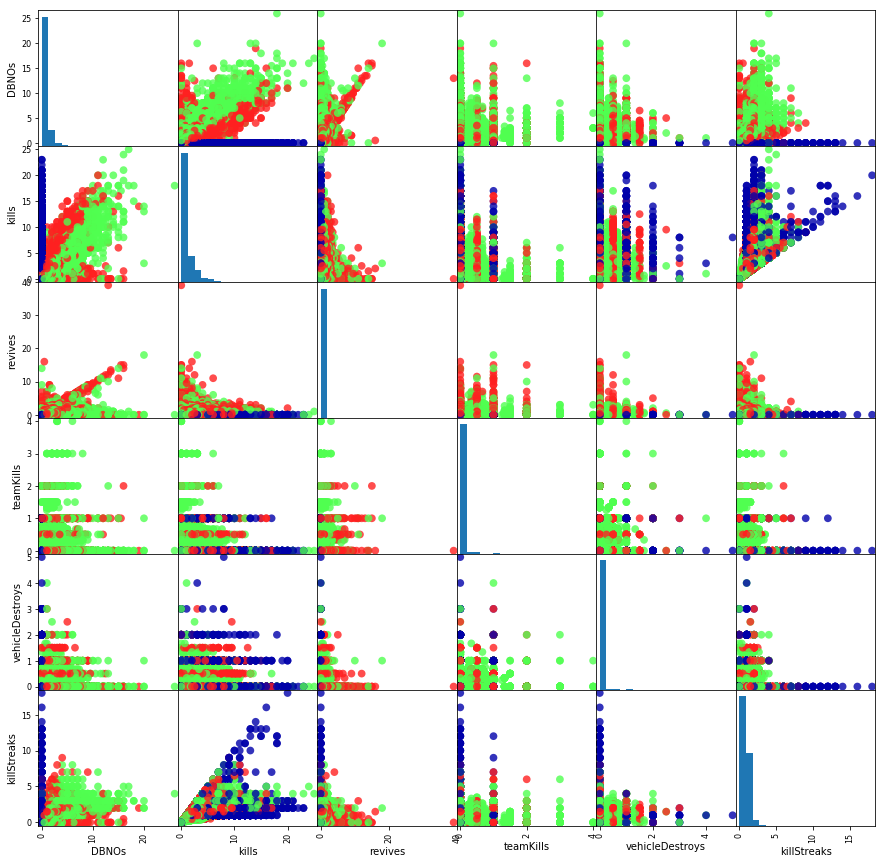

In [16]:
#산점도
pd.plotting.scatter_matrix(battle.drop('matchType',axis=1), c=battle.matchType, figsize=(15,15), marker='o',
                          hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)
#bins 막대기 수, s 원 크기, alpha 투명도